In [162]:
import sympy
from sympy import Ellipse, Point, Line, S, Eq, latex, plot_implicit
from sympy import symbols, simplify, Rational, solve, linsolve, expand, factor
from IPython.display import Latex

# Практическое занятие 14
# Компьютерный практикум по алгебре на Python
### Задание 1.
Построить эллипс с центром в точке А(1, 2), полуосями 3 и 2. Вычислить и вывести на экран эксцентриситет, площадь и длину дуги полученного эллипса, центр, полуоси, periapsis, apoapsis, межфокусное расстояние и фокусы.

In [163]:
Ellipse1 = Ellipse(Point(1, 2), hradius=3, vradius=2)

props = {'eccentricity': Ellipse1.eccentricity,
         'area': Ellipse1.area,
         'circumference': Ellipse1.circumference,
         'center': Ellipse1.center,
         'hradius': Ellipse1.hradius,
         'vradius': Ellipse1.vradius,
         'periapsis': Ellipse1.periapsis,
         'apoapsis': Ellipse1.apoapsis,
         'focus\_distance': Ellipse1.focus_distance,
         'foci': Ellipse1.foci}
display(*[Latex(f'{key} = {latex(props[key])}') for key in props])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Вывести на экран **уравнение** эллипса из задания 1, повернутого на 30 градусов против часовой стрелки относительно его центра,  переменные $u$ и $v$.

Изобразить на общем графике эллипс и повернутый эллипс.

Eq((u/3 - 1/3)**2 + (v/2 - 1)**2, 1)

Eq((u + sqrt(3)*(v - 2)/3 - 1)**2/12 + 3*(v - sqrt(3)*(u - 1)/3 - 2)**2/16, 1)

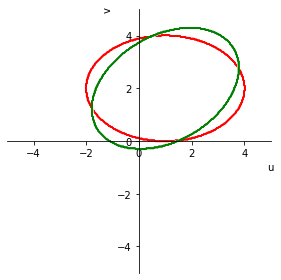

In [164]:
u, v, x, y = symbols('u v x y')

expr2 = Ellipse1.equation(x = 'u', y = 'v')
eq2 = Eq(expr2, 0)
right_side = -expr2.as_coeff_add()[0]
eq2_new = Eq(expr2 + right_side, right_side)

expr2_slope = Ellipse1.equation(x = 'u', y = 'v', _slope=sympy.tan(30 * sympy.pi / 180))
eq2_slope = Eq(expr2_slope, 0)
right_slope_side = -expr2_slope.as_coeff_add()[0]
eq2_slope_new = Eq(expr2_slope + right_slope_side, right_slope_side)
display(eq2_new, eq2_slope_new)

symb_free = eq2_slope.free_symbols
dict_free = {str(a): a for a in symb_free}

graph = plot_implicit(eq2_new,
              (dict_free['u'], -5, 5),
              (dict_free['v'], -5, 5),
              aspect_ratio=(1, 1),
              show = False,
              adaptive=False,
              line_color = 'r')

graph.extend(plot_implicit(eq2_slope_new,
              (dict_free['u'], -5, 5),
              (dict_free['v'], -5, 5),
              aspect_ratio=(1, 1),
              show = False,
              adaptive=False,
              line_color = 'g')
)

graph.show()

### Задание 3.
Найти вершины эллипса из Задания 1.

Указание: вершины эллипса искать как решение системы уравнений, составленной из уравнения эллипса и уравнения прямой, проходящей через форкусы (воспользоваться Line и методом equation()); вторую пару вершин получить как решение системы из уравнения эллипса и прямой, проходящей через центр эллипса перпендикулярно прямой, проходящей через фокусы. 

In [165]:
points = Ellipse1.foci
line = Line(points[0], points[1])
eq1 = Eq(line.equation(x = x, y = y), 0)
eq2 = Eq(Ellipse1.equation(x = x, y = y), 0)
cords = sympy.solve([eq1, eq2], [x, y])

new_line = line.perpendicular_line(Ellipse1.center)

eq3 = Eq(new_line.equation(x = x, y = y), 0)
cords += sympy.solve([eq2, eq3], [x, y])
display(Latex('Вершины: ' + latex(cords)))

<IPython.core.display.Latex object>

### Задание 4*.
Провести касательные к эллипсу из Задания 1 через его вершины.

Указание: использовать equation прямых Line, plot_implicit. Для корректного изображения на графике горизонтальных прямых в plot_implicit указывать диапазоны значений и переменной $x$ и переменной $y$.

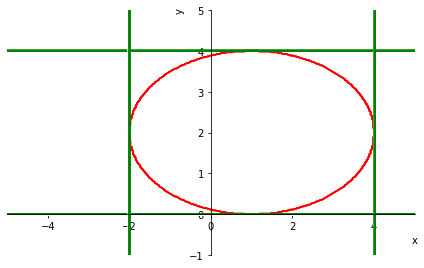

In [166]:
my_graph = plot_implicit(eq2,
              (x, -5, 5),
              (y, -1, 5),
              aspect_ratio=(1, 1),
              show = False,
              adaptive=False,
              line_color = 'r')

arr1 = [(Ellipse1.hradius), (Ellipse1.vradius)]
arr2 = [line.equation(x = x, y = y), new_line.equation(x = x, y = y)]

my_graph.extend(plot_implicit(Eq(arr2[0] + 0 * y + arr1[1], 0),
          (x, -5, 5),
          (y, -1, 5),
          aspect_ratio=(1, 1),
          show = False,
          adaptive=False,
          line_color = 'g')
)
my_graph.extend(plot_implicit(Eq(arr2[0] + 0 * y - arr1[1], 0),
          (x, -5, 5),
          (y, -1, 5),
          aspect_ratio=(1, 1),
          show = False,
          adaptive=False,
          line_color = 'g')
)
my_graph.extend(plot_implicit(Eq(arr2[1] + 0 * y + arr1[0], 0),
          (x, -5, 5),
          (y, -1, 5),
          aspect_ratio=(1, 1),
          show = False,
          adaptive=False,
          line_color = 'g')
)
my_graph.extend(plot_implicit(Eq(arr2[1] + 0 * y - arr1[0], 0),
          (x, -5, 5),
          (y, -1, 5),
          aspect_ratio=(1, 1),
          show = False,
          adaptive=False,
          line_color = 'g')
)
    

my_graph.show()

### Задание 5**.
Провести касательные к повернутому эллипсу из Задания 2 через его вершины.

In [167]:
def get_new_line(a, b, c, alpha):
    new_x1 = c[0] + (a[0] - c[0]) * sympy.cos(alpha) - (a[1] - c[1]) * sympy.sin(alpha)
    new_y1 = c[1] + (a[0] - c[0]) * sympy.sin(alpha) + (a[1] - c[1]) * sympy.cos(alpha)

    new_x2 = c[0] + (b[0] - c[0]) * sympy.cos(alpha) - (b[1] - c[1]) * sympy.sin(alpha)
    new_y2 = c[1] + (b[0] - c[0]) * sympy.sin(alpha) + (b[1] - c[1]) * sympy.cos(alpha)
    display(Point(new_x1, new_y1), Point(new_x2, new_y2))
    return Line(Point(new_x1, new_y1), Point(new_x2, new_y2)) 

In [ ]:
new_points = [Point(-2, 0), Point(4, 0), Point(4, 4), Point(-2, 4), Point(-2, 0)]
eques = []
for i in range(4):
    eques.append(Eq(get_new_line(new_points[i], new_points[i + 1], Point(1, 2), 30 * sympy.pi / 180).equation(x = x, y = y), 0))


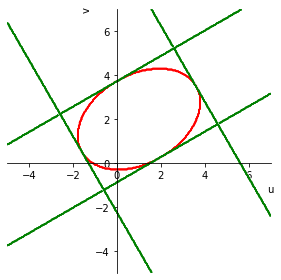

In [169]:
my_graph2 = plot_implicit(eq2_slope_new,
              (dict_free['u'], -5, 7),
              (dict_free['v'], -5, 7),
              aspect_ratio=(1, 1),
              show = False,
              adaptive=False,
              line_color = 'r')


for eq in eques:
    my_graph2.extend(plot_implicit(eq,
          (x, -5, 7),
          (y, -5, 7),
          aspect_ratio=(1, 1),
          show = False,
          adaptive=False,
          line_color = 'g')
    )

my_graph2.show()

###  Индивидуальное задание
Эллипс с центром $A$, вертикальной полуосью $b$ и эксцентриситетом $\varepsilon$.
Изобразить на графике эллипс, а также эллипс, повернутый на угол $\alpha$ градусов против часовой стрелки. 

Вывести на экран центр и фокусы эллипса, длины полуосей, уравнение эллипса, вершины эллипса.

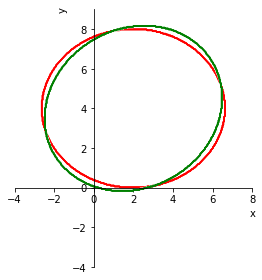

3*(x - 2)**2/64 + (y/4 - 1)**2 - 1

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [170]:
#126
Ellipse3 = Ellipse(Point(2, 4), hradius = 8 * sympy.sqrt(3) / 3, eccentricity = S(1) / 2)
alpha = sympy.pi / 6

my_graph3 = plot_implicit(Eq(Ellipse3.equation(x = x, y = y), 0),
              (x, -4, 8),
              (y, -4, 9),
              aspect_ratio=(1, 1),
              show = False,
              adaptive=False,
              line_color = 'r')

my_graph3.extend(plot_implicit(Ellipse3.equation(x = x, y = y, _slope=sympy.tan(alpha)),
              (x, -4, 8),
              (y, -4, 9),
              aspect_ratio=(1, 1),
              show = False,
              adaptive=False,
              line_color = 'g')
)


my_graph3.show()

display(Ellipse3.equation(x = x, y = y))

props = {'center': Ellipse3.center,
         'hradius': Ellipse3.hradius,
         'vradius': Ellipse3.vradius,
         'foci': Ellipse3.foci}
display(*[Latex(f'{key} = {latex(props[key])}') for key in props])

points = Ellipse3.foci
line = Line(points[0], points[1])
eq1 = Eq(line.equation(x = x, y = y), 0)
eq2 = Eq(Ellipse3.equation(x = x, y = y), 0)
cords = sympy.solve([eq1, eq2], [x, y])

new_line = line.perpendicular_line(Ellipse1.center)

eq3 = Eq(new_line.equation(x = x, y = y), 0)
cords += sympy.solve([eq2, eq3], [x, y])
display(Latex('Вершины: ' + latex(cords)))